In [1]:
# Import

from src.load_data import loader
from numpy.linalg import eig
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
# Load Data

loader = loader()
deps, mods = loader.load_data()

In [3]:
# Test
print(deps.keys())
# print(deps.get('vectors_pca'))
# 'anger', 'chatbot_familiarity', 'need_for_empathy', 'preference_for_online_interaction'
print(mods.keys())

dict_keys(['credibility', 'cognitive_effort', 'helpfulness'])
dict_keys(['chatbot_familiarity', 'anger', 'online_preference', 'empathy'])


In [4]:
# Concatenation

cdeps = pd.concat(list(deps.values()), axis=1)

## with chatbot_familiarity
cmods_w = pd.concat(list(mods.values()), axis=1)

## without chatbot_familiary
lst = ['anger','empathy','online_preference']
lmods = [mods.get(i) for i in lst]
cmods_wo = pd.concat(lmods, axis=1)
# print(cmods_w.head())



In [5]:
def scale(data):
    std = data.std()
    mean = data.mean()
    z = (data-mean)/std
    return z

In [6]:
def pca(data):
    data = data.to_numpy()
    cov = np.cov(data.T)
    eigs, vectors = eig(cov)
    eigs_pec = eigs/eigs.sum()
    plt.plot(eigs_pec)
    plt.show()    

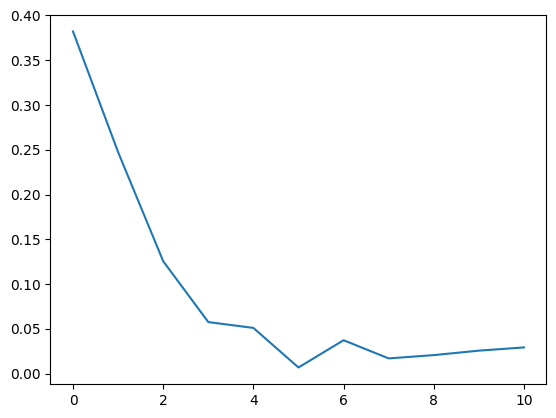

In [7]:
pca(scale(cdeps))

# Does not Match the number of variables
# Here 6 makes more sense but we have 4 variables

# PCA for 2,3,4,5,6
# Compare Loadings (>0.5) on two factors 
# Kappa Values

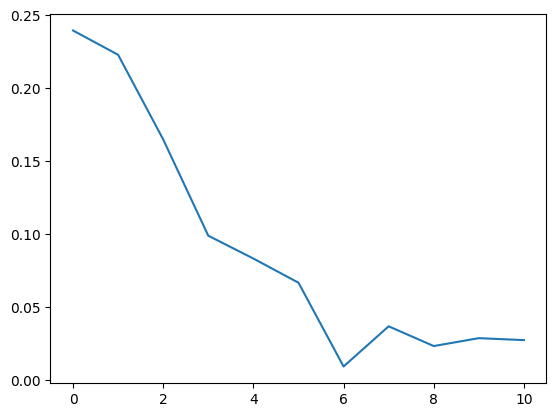

In [8]:
pca(scale(cmods_w))

# Does not Match the number of variables
# Here 3 makes more sense but we have 4 variables

# CPA for 2,3,4

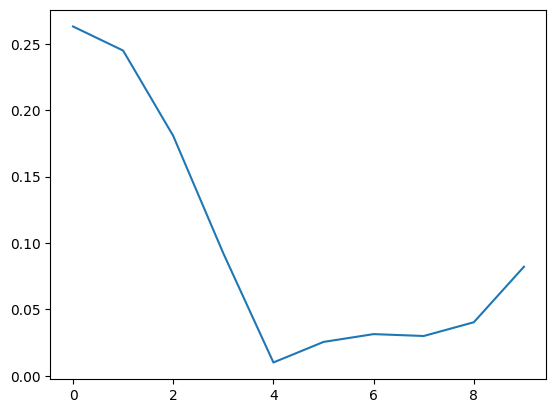

In [9]:
# PCA subgroup test for chatbot_familiarity
pca(scale(cmods_wo))

## Different, therefore chatbot_familiarity is necessary.

Components 2:  [0.35839921 0.27868298] 0.6370821842311054
Components 3:  [0.35839921 0.27868298 0.09453708] 0.7316192607193819
Components 4:  [0.35839921 0.27868298 0.09453708 0.07462953] 0.8062487932812215
Components 5:  [0.35839921 0.27868298 0.09453708 0.07462953 0.06402488] 0.8702736753514312
Components 6:  [0.35839921 0.27868298 0.09453708 0.07462953 0.06402488 0.03802381] 0.9082974839427892


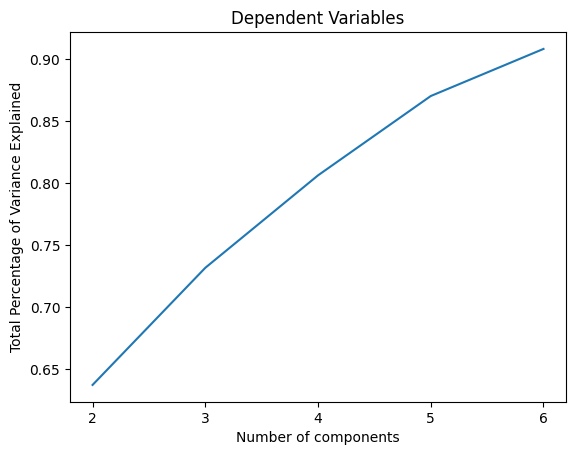

In [10]:
# Detailed PCA Test

## Dependent Vars
tevr_lst = []
for i in (2, 3, 4, 5, 6):
    pca = PCA(n_components=i)
    pca.fit_transform(cdeps)
    evr = pca.explained_variance_ratio_
    print("Components "+str(i)+": ", evr, evr.sum())
    tevr_lst.append(evr.sum())
plt.plot(tevr_lst)
plt.xticks(np.arange(5),['2','3','4','5','6'])
plt.xlabel('Number of components')
plt.ylabel('Total Percentage of Variance Explained')
plt.title('Dependent Variables')
plt.show()

Components 2:  [0.31445705 0.30413496] 0.6185920120715631
Components 3:  [0.31445705 0.30413496 0.12773118] 0.7463231875255258
Components 4:  [0.31445705 0.30413496 0.12773118 0.08243315] 0.8287563372915454
Components 5:  [0.31445705 0.30413496 0.12773118 0.08243315 0.04089409] 0.8696504292742252


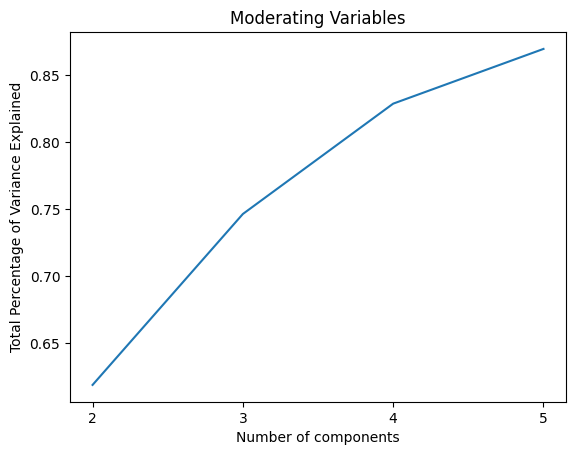

In [11]:
## Moderating Vars
tevr_lst = []
for i in (2, 3, 4, 5):
    pca = PCA(n_components=i)
    pca.fit_transform(cmods_w)
    evr = pca.explained_variance_ratio_
    print("Components "+str(i)+": ", evr, evr.sum())
    tevr_lst.append(evr.sum())
plt.plot(tevr_lst)
plt.xticks(np.arange(4),['2','3','4','5'])
plt.xlabel('Number of components')
plt.ylabel('Total Percentage of Variance Explained')
plt.title('Moderating Variables')
plt.show()

In [12]:
# Varimax
from numpy import eye, asarray, dot, sum, diag
from numpy.linalg import svd
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(Phi, R)


In [13]:
def loadings_rotate(n_components, data):
    pca = PCA(n_components)
    pca.fit_transform(data)
    loadings = pca.components_.T
    m_loadings = pd.DataFrame(loadings, index=data.columns.values)
    print(m_loadings)
    loadings_rotated = varimax(loadings)
    m_loadings_rotated = pd.DataFrame(loadings_rotated, index=data.columns.values)
    print(m_loadings_rotated)


In [14]:
loadings_rotate(4, cdeps)

                     0         1         2         3
Trustworthy  -0.239377 -0.291525  0.131599 -0.183062
Honesty      -0.262757 -0.331617  0.451095 -0.564138
Ability      -0.371994 -0.395858  0.108366  0.730791
OverallTrust -0.310647 -0.345069  0.074965  0.069004
Thinking      0.354707 -0.383970 -0.117813 -0.039077
Contemplated  0.351881 -0.329139 -0.286618  0.118845
Demanding     0.337087 -0.348767  0.095358 -0.081278
Effort        0.335899 -0.342224 -0.007745 -0.040739
helpfulness  -0.250343 -0.086661 -0.486753 -0.128942
usefulness   -0.237216 -0.103954 -0.482545 -0.168920
informative  -0.209142 -0.128177 -0.432286 -0.200852
                     0         1         2         3
Trustworthy   0.025691 -0.404675 -0.114217  0.125106
Honesty      -0.011479 -0.831879  0.026426 -0.088868
Ability      -0.002728  0.064771  0.027765  0.914280
OverallTrust  0.020988 -0.273015 -0.137497  0.363419
Thinking      0.535961 -0.009848 -0.030053 -0.020061
Contemplated  0.522130  0.199604 -0.115478  0.